In [75]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
except ModuleNotFoundError:
    pass
else:
    pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [77]:
filepath = '/content/drive/Othercomputers/My Laptop/data-science-assignments/07 - Logistic Regression Regularization/'
filename = 'cancer.csv'
filepathname = filepath + filename

In [78]:
df = pd.read_csv(filepathname, header = 0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [79]:
df.replace({'diagnosis':{'M':1,'B':0}},inplace=True)

Text(0.5, 0, 'concave points_worst')

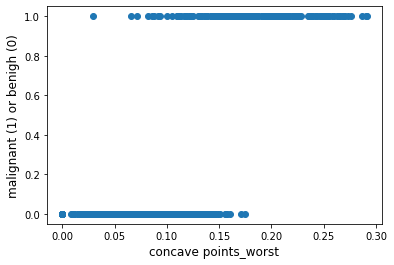

In [80]:
plt.scatter(df['concave points_worst'], df['diagnosis']);
plt.ylabel('malignant (1) or benigh (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)

In [81]:
X = df[['concave points_worst']]
y = df['diagnosis']

In [82]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Text(0.5, 0, 'concave points_worst')

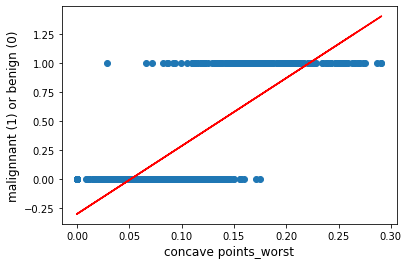

In [83]:
# Make a linear regression instance
lr = LinearRegression()
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
lr.fit(X,y)
# Get Predictions for original x values
# This is not how we will do it for the rest of the course
predictions = lr.predict(X)
plt.scatter(df['concave points_worst'], df['diagnosis'])
plt.plot(df['concave points_worst'], predictions, color = 'red')
plt.ylabel('malignnant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)

In [93]:
# Make an instance of the model
logreg = LogisticRegression(C = 1000)
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# Scaling logistic regression
scaler = StandardScaler()
# Fit on the training set only
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Training the model on the data, storing the information learned drom the data
# Model is learning the relationship between X and y
logreg.fit(X_train, y_train)

LogisticRegression(C=1000)

In [94]:
logreg.score(X_test,y_test)

0.9300699300699301

In [85]:
logreg.get_params()

{'C': 0.018,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [86]:
example_df = pd.DataFrame(data = {'worst_concave_points':X_test.flatten(),'diagnosis':y_test})
example_df['logistic_preds'] = pd.DataFrame(logreg.predict_proba(X_test)).loc[:,1].values
example_df = example_df.sort_values(['logistic_preds'])

Text(0.5, 0, 'concave points_worst')

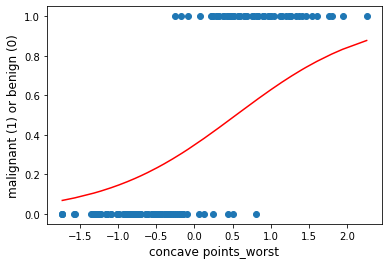

In [87]:
plt.scatter(example_df['worst_concave_points'], example_df['diagnosis'])
plt.plot(example_df['worst_concave_points'], example_df['logistic_preds'].values,color='red')
plt.ylabel('malignant (1) or benign (0)',fontsize = 12)
plt.xlabel('concave points_worst',fontsize = 12)